In [225]:
import pandas as pd
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [262]:
# Glacier ablation over 2000-2016 (Miles et al. 2021, Supp. Tab. 4)
TotAbl_BV = {'INDUS' : 17.7} # Gt/a
ImAbl_BV = {'INDUS' : 6.2} # Gt/a
TotAblUnc_BV = {'INDUS' : 3.64} # Gt/a
# Basin area in sq km
BasinArea_BV = {'INDUS': 865012.6}
# Mean annual precip from WorldClim
TotPrec_mm_BV = {'INDUS' : 424} # mm/a

In [3]:
# Fill the above dictionnaries to repeat the analysis with BRAHMAPUTRA or GANGES
BV='INDUS'

In [263]:
# Convert to mm
BasinArea = BasinArea_BV[BV]
TotAbl = TotAbl_BV[BV]
ImAbl = ImAbl_BV[BV]
TotAbl_mm = 1e6*TotAbl/BasinArea
ImAbl_mm = 1e6*ImAbl/BasinArea
TotAblUnc_mm = 1e6*TotAblUnc_BV[BV]/BasinArea
TotPrec_mm = TotPrec_mm_BV[BV]

In [180]:
# Function to read tables created by hmasr-mosaic.sh
def readTable(f):
    df = pd.read_csv(f,sep=' ', header=0, index_col=0)
    df = df.rename(columns=int, index=int)
    df.index.name = 'Day of year'
    df.columns.name = 'Year'
    return df

In [181]:
# Load data
snowmelt_mm = readTable('tables/HMA_SR_D_v01_MMCUM_SNOWMELT_'+BV+'.csv')
snowmelt_m3 = readTable('tables/HMA_SR_D_v01_DAYM3_SNOWMELT_'+BV+'.csv')
sublim_mm = readTable('tables/HMA_SR_D_v01_MMCUM_SUBLIM_'+BV+'.csv')
sublim_m3 = readTable('tables/HMA_SR_D_v01_DAYM3_SUBLIM_'+BV+'.csv')

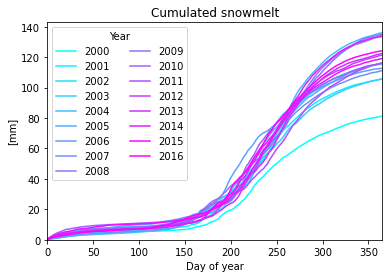

In [261]:
# Plot cumulated snowmelt
t0,tf = 0,365
ax = snowmelt_mm.plot(colormap='cool')
ax.set(ylabel='[mm]', title='Cumulated snowmelt')
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.legend(loc='upper left',ncol=2, title='Year');

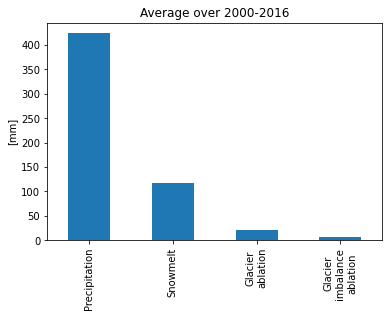

In [265]:
# Compare mean annual snowmelt to glacier ablation
TotSnMelt_mm = snowmelt_mm.mean(axis=1)[tf]
df = pd.DataFrame.from_dict(
    {'Precipitation' : [TotPrec_mm],
     'Snowmelt':[TotSnMelt],
     'Glacier\nablation':[TotAbl_mm],
     'Glacier\nimbalance\nablation':[ImAbl_mm]},
    orient='index')
ax = df.plot.bar(legend=None)
ax.set(ylabel='[mm]', title='Average over 2000-2016');

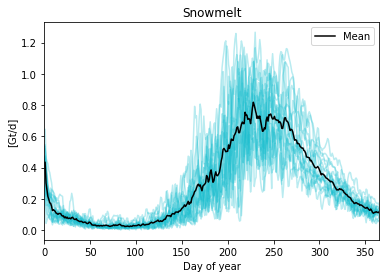

In [158]:
# from 1e-3 m3/d to Gt/d 
snowmelt_Gtd = snowmelt_m3.applymap(lambda x: x*1e-12)
ax = snowmelt_Gtd.plot(color='tab:cyan', alpha=0.3)
h = ax.plot(snowmelt_Gtd.mean(axis=1), color='k')
ax.legend(h,('Mean',))
ax.set_xlim(left=t0, right=tf)
ax.set(ylabel='[Gt/d]', title='Snowmelt');

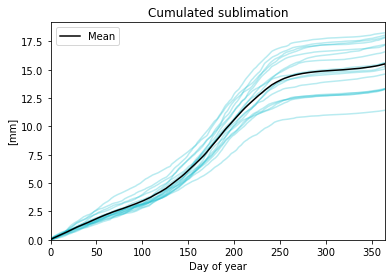

In [159]:
ax = sublim_mm.plot(color='tab:cyan', alpha=0.3)
ax.set(ylabel='[mm]', title='Cumulated sublimation')
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
h = ax.plot(sublim_mm.mean(axis=1), color='k')
ax.legend(h,('Mean',));

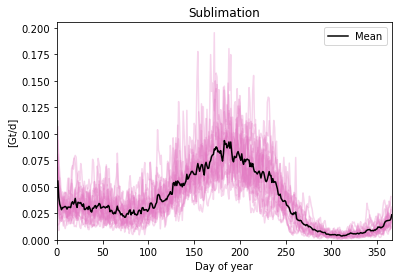

In [134]:
# from 1e-3 m3/d to Gt/d 
sublim_Gtd = sublim_m3.applymap(lambda x: x*1e-12)
ax = sublim_Gtd.plot(color='tab:pink', alpha=0.3, legend=None)
h = ax.plot(sublim_Gtd.mean(axis=1),)
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0)
ax.legend(h,('Mean',))
ax.set(ylabel='[Gt/d]', title='Sublimation');

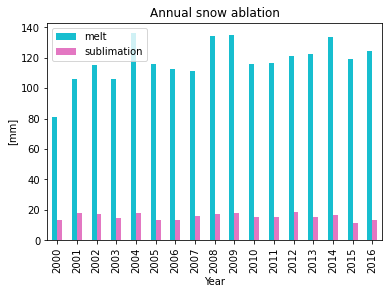

In [131]:
# Compare annual melt and sublimation (max to get the annual total)
sm = pd.concat([snowmelt_mm.max(),sublim_mm.max()], axis=1, 
               keys=['melt', 'sublimation'])
ax = sm.plot.bar(color=['tab:cyan','tab:pink'])
ax.set(ylabel='[mm]', title='Annual snow ablation');

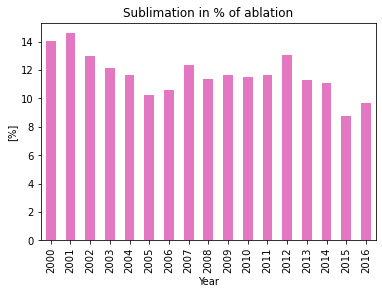

In [139]:
# plot sublimation:ablation ratio
sublimRatio = 100*sublim_mm.max()/(snowmelt_mm.max()+sublim_mm.max())
ax = sublimRatio.plot.bar(color='tab:pink')
ax.set(ylabel='[%]', title='Sublimation in % of ablation');

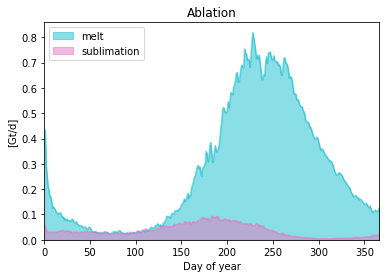

In [143]:
med = pd.concat([snowmelt_Gtd.mean(axis=1), sublim_Gtd.mean(axis=1)], axis=1,
               keys=['melt', 'sublimation'])
ax = med.plot.area(color=['tab:cyan','tab:pink'], stacked = False)
ax.set(ylabel='[Gt/d]', title='Ablation');
ax.set_xlim(left=t0, right=tf)
ax.set_ylim(bottom=0);